In [2]:
pip install pydub


  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install librosa

  Using cached librosa-0.10.1-py3-none-any.whl.metadata (8.3 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached soundfile-0.12.1-py2.py3-none-manylinux_2_31_x86_64.whl.metadata (14 kB)
  Using cached pooch-1.8.1-py3-none-any.whl.metadata (9.5 kB)
  Using cached soxr-0.3.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
Using cached librosa-0.10.1-py3-none-any.whl (253 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached pooch-1.8.1-py3-none-any.whl (62 kB)
Using cached soundfile-0.12.1-py2.py3-none-manylinux_2_31_x86_64.whl (1.2 MB)
Using cached soxr-0.3.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import torch.optim as optim
import os
import pandas as pd
import numpy as np
import librosa.display, os
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
from torch.utils.data import DataLoader
import torch.optim as optim
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from pydub import AudioSegment  # Requires pydub library for getting audio length

In [11]:
dataset_path = "heart_dataset.zip"
extracted_dir = "heart_dataset"
os.makedirs(extracted_dir, exist_ok=True)

In [126]:
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)
print("Dataset has been extracted.")

Dataset has been extracted.


In [27]:
root_dir = "heart_dataset"
csv_dest = "meta_data.csv"

In [39]:
def generate_csv(root_dir, csv_dest):
    data = []
    for label in os.listdir(root_dir):
        label_dir = os.path.join(root_dir, label)
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                if filename.endswith('.wav'):
                    file_path = os.path.join(label_dir, filename)
                    audio_length = get_audio_length(file_path)
                    data.append({'File': filename, 'Label': label, 'Audio_Length': audio_length})

    df = pd.DataFrame(data)
    df.to_csv(csv_dest, index=False)

In [14]:
def get_audio_length(file_path):
    audio = AudioSegment.from_file(file_path)
    return len(audio) / 1000 # convert to seconds from milliseconds

In [ ]:
generate_csv(root_dir, csv_dest)

In [29]:
df = pd.read_csv(csv_dest)

In [30]:
df

,File,Label,Audio_Length
0,New_MR_030.wav,MR,2.244
1,New_MR_095.wav,MR,2.942
2,New_MR_060.wav,MR,2.197
3,New_MR_007.wav,MR,1.806
4,New_MR_052.wav,MR,2.209
...,...,...,...
995,New_AS_173.wav,AS,3.016
996,New_AS_116.wav,AS,2.616
997,New_AS_084.wav,AS,2.612
998,New_AS_138.wav,AS,2.365


In [18]:
label_counts = df['Label'].value_counts()

In [19]:
label_counts

Label
MR        200
MS        200
Normal    200
MVP       200
AS        200
Name: count, dtype: int64

In [20]:
length_counts = df['Audio_Length'].value_counts()

In [21]:
length_counts

Audio_Length
2.630    7
2.685    7
2.604    6
2.084    6
2.681    6
        ..
1.576    1
2.575    1
2.099    1
2.200    1
2.365    1
Name: count, Length: 558, dtype: int64

In [83]:
data_less2 = df[df['Audio_Length'] < 2]

In [91]:
minimum_length = data_less2['Audio_Length'].min()
min_index = data_less2['Audio_Length'].idxmin()
filename_of_minimum_length = data_less2.loc[min_index, 'File']

In [93]:
print("Filename of the entry with the maximum 'Audio_Length':", filename_of_minimum_length)

Filename of the entry with the maximum 'Audio_Length': New_MS_006.wav


In [74]:
minimum_length

1.156

In [75]:
length_counts_less2 = data_less2.value_counts()

In [76]:
len(length_counts_less2)

49

In [62]:
length_counts_less2

File             Label  Audio_Length
New_MR_005.wav   MR     1.576           1
New_MS_014.wav   MS     1.214           1
New_MS_040.wav   MS     1.974           1
New_MS_124.wav   MS     1.976           1
New_MS_191.wav   MS     1.998           1
New_MVP_098.wav  MVP    1.742           1
New_MVP_099.wav  MVP    1.728           1
New_MVP_100.wav  MVP    1.776           1
New_MVP_101.wav  MVP    1.792           1
New_MVP_102.wav  MVP    1.938           1
New_MVP_103.wav  MVP    1.954           1
New_MVP_134.wav  MVP    1.960           1
New_MVP_137.wav  MVP    1.855           1
New_MVP_138.wav  MVP    1.856           1
New_MVP_149.wav  MVP    1.991           1
New_MVP_152.wav  MVP    1.990           1
New_MVP_155.wav  MVP    1.954           1
New_MVP_167.wav  MVP    1.994           1
New_MVP_172.wav  MVP    1.974           1
New_MVP_191.wav  MVP    1.726           1
New_MVP_192.wav  MVP    1.764           1
New_MVP_193.wav  MVP    1.791           1
New_MVP_194.wav  MVP    1.878          

In [65]:
data_more2 = df[df['Audio_Length'] > 2]

In [88]:
maximum_length = data_more2['Audio_Length'].max()
max_index = data_more2['Audio_Length'].idxmax()
filename_of_maximum_length = data_more2.loc[max_index, 'File']

In [89]:
maximum_length

3.993

In [90]:
filename_of_maximum_length

'New_MVP_003.wav'

In [40]:
length_counts_greater2 = data_more2.value_counts()

In [41]:
len(length_counts_greater2)

750

In [107]:
def getSpectrogramMel(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

In [108]:
minimum_length_path = "heart_dataset/MS/New_MS_006.wav"
dest_minimum = "New_MS_006-minimum.png"

In [109]:
maximum_length_path = "heart_dataset/MVP/New_MVP_003.wav"
dest_maximum = "New_MVP_003-maximum.png"

In [110]:
getSpectrogram(minimum_length_path,dest_minimum)

In [111]:
getSpectrogram(maximum_length_path,dest_maximum)

In [112]:
another_length_path = "heart_dataset/MVP/New_MVP_004.wav"
another_MVP = "New_MVP_004-another.png"

In [113]:
getSpectrogram(another_length_path,another_MVP)

In [123]:
def makeSpectrogramImagemel(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        getSpectrogramMel(input_file, output_file)

In [142]:
makeSpectrogramImagemel('heart_dataset/AS', 'heart_dataset_image/AS')

In [143]:
makeSpectrogramImagemel('heart_dataset/MR', 'heart_dataset_image/MR')

In [144]:
makeSpectrogramImagemel('heart_dataset/MS', 'heart_dataset_image/MS')

In [145]:
makeSpectrogramImagemel('heart_dataset/MVP', 'heart_dataset_image/MCP')

In [146]:
makeSpectrogrmakeSpectrogramImagemelamImage('heart_dataset/Normal', 'heart_dataset_image/Normal')

In [32]:
transform = transforms.Compose([
    transforms.Resize((100, 100)),  
    transforms.ToTensor()         
])

In [33]:
X = df["File"]
Y = df["Label"]

In [34]:
X[0].split('.', 1)[0]

'New_MR_030'

In [35]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform Y
Y_encoded = label_encoder.fit_transform(Y)

print("Original labels:", Y[:10])
print("Encoded labels:", Y_encoded[:10])

Original labels: 0    MR
1    MR
2    MR
3    MR
4    MR
5    MR
6    MR
7    MR
8    MR
9    MR
Name: Label, dtype: object
Encoded labels: [1 1 1 1 1 1 1 1 1 1]


In [36]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [96]:
class heartDataset(Dataset):
    def __init__(self, X , Y, transform=None):
        self.image_name = X
        self.labels = Y
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = self.image_name.iloc[idx]
        parts = img_name.split('_', 2)[1]
        if parts == "N":
            parts = "Normal"
        img_name_png = img_name.split('.', 1)[0]

        img_path = os.path.join("heart_dataset_image/"+ parts +"/" + img_name_png + ".png")

        # Open image
        img = Image.open(img_path)

        # Convert label to PyTorch tensor
        label = self.labels[idx]

        # Apply transforms if available
        if self.transform:
            img = self.transform(img)

        return img, label

In [97]:
train_Dataset = heartDataset(X_train,y_train, transform=transform)
test_Dataset = heartDataset(X_test,y_test, transform=transform)
val_Dataset = heartDataset(X_val,y_val, transform=transform)

In [98]:
train_Dataset[0][0].shape

torch.Size([4, 100, 100])

In [148]:
batch_size = 2

train_loader = DataLoader(train_Dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_Dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_Dataset, batch_size=batch_size, shuffle=False)

In [100]:
def train(model, train_loader, test_loader, criterion, optimizer, num_epochs):

    train_losses = []
    test_losses = []
    accuracies = []
    best_test_loss = float('inf')
    no_improvement_count = 0
    patience = 4

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            
            loss.backward()  # Backward pass
            optimizer.step()  # Update model parameters

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.sampler)
        train_losses.append(epoch_loss)

        

        correct = 0
        total = 0
        test_loss = 0.0

        
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():  # Disable gradient calculation for inference
            for inputs, labels in test_loader:
                inputs, labels = inputs.cuda(), labels.cuda()

                outputs = model(inputs)  # Forward pass
                loss = criterion(outputs, labels)
                test_loss += loss.item() * labels.size(0)

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_loss = test_loss / len(test_loader.sampler)
        test_losses.append(test_loss)

        accuracy = (correct / total) * 100
        accuracies.append(accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Training Loss: {epoch_loss:.4f}, '
              f'Testing Loss: {test_loss:.4f}, '
              f'Accuracy on test set: {accuracy:.2f}%')
        
        # Early stopping: check if test loss has stopped improving
        if test_loss <= best_test_loss:
            best_test_loss = test_loss
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= patience:
            print(f"No improvement in test loss for {patience} epochs. Stopping training.")
            break

    # Plot learning curve
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

    return train_losses, test_losses, accuracies

In [161]:
class ModelV1(torch.nn.Module):

    def __init__(self):
        super(ModelV1, self).__init__()

        # Define convolutional layer
        self.conv1 = nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, stride=1, padding=1)
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Sigmoid()
        self.pool = nn.MaxPool2d(kernel_size=3, stride=1)

        # Define fully connected layers
        self.fc1 = nn.Linear(4*98*98,200)
        self.fc2 = nn.Linear(200, 5)  # Adjusted to have 9 output labels

    def forward(self, x):

        # Apply convolutional layers
        x = self.pool(self.activation1(self.conv1(x)))

        # Flatten the output before passing to fully connected layer
        m = nn.Flatten()
        x = m(x)

        # Apply fully connected layers
        x = self.activation2(self.fc1(x))
        x = self.fc2(x)

        return x

In [162]:
learning_rate = 0.0001
num_epochs = 100

# Initialize model
model = ModelV1().cuda()

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Epoch [1/100], Training Loss: 1.5955, Testing Loss: 1.3766, Accuracy on test set: 52.00%
Epoch [2/100], Training Loss: 1.1387, Testing Loss: 0.9702, Accuracy on test set: 68.00%
Epoch [3/100], Training Loss: 0.8381, Testing Loss: 0.7609, Accuracy on test set: 79.33%
Epoch [4/100], Training Loss: 0.6696, Testing Loss: 0.6561, Accuracy on test set: 82.67%
Epoch [5/100], Training Loss: 0.5461, Testing Loss: 0.5293, Accuracy on test set: 84.67%
Epoch [6/100], Training Loss: 0.4804, Testing Loss: 0.4968, Accuracy on test set: 84.67%
Epoch [7/100], Training Loss: 0.4222, Testing Loss: 0.4693, Accuracy on test set: 86.67%
Epoch [8/100], Training Loss: 0.3769, Testing Loss: 0.3704, Accuracy on test set: 89.33%
Epoch [9/100], Training Loss: 0.3295, Testing Loss: 0.3566, Accuracy on test set: 88.67%
Epoch [10/100], Training Loss: 0.3087, Testing Loss: 0.3951, Accuracy on test set: 89.33%
Epoch [11/100], Training Loss: 0.2682, Testing Loss: 0.2773, Accuracy on test set: 90.00%
Epoch [12/100], Tra

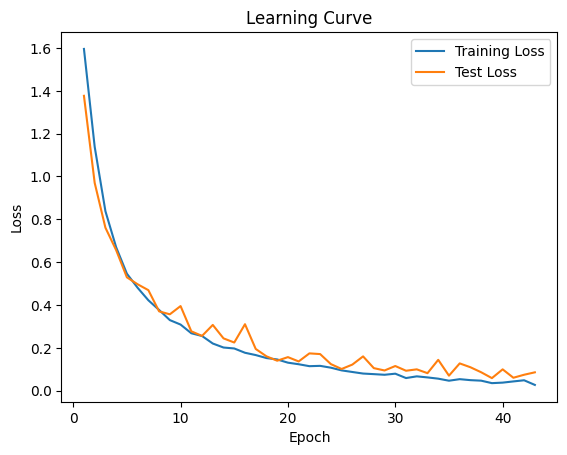

In [163]:
train_losses,test_losses,accuracy = train(model, train_loader, test_loader, criterion, optimizer, num_epochs)

In [ ]:
def eval(model, val_loader, criterion, optimizer):

  model.eval()  # Set model to evaluation mode
  predicted_labels = []
  true_labels = []
  
  with torch.no_grad():  # Disable gradient calculation for inference
      correct = 0
      total = 0

      for inputs, labels in val_loader:
          # Forward pass
          inputs,labels = inputs.cuda(),labels.cuda()

          outputs = model(inputs)

          # Get predicted labels
          _, predicted = torch.max(outputs, 1)

          predicted_labels.extend(predicted.cpu().numpy())
          true_labels.extend(labels.cpu().numpy())
        
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  # Calculate accuracy
  accuracy = (correct / total) * 100
  # Calculate confusion matrix
  conf_matrix = confusion_matrix(true_labels, predicted_labels)

  # Plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()
    
  print(f"Accuracy on validation set: {accuracy:.2f}%") 

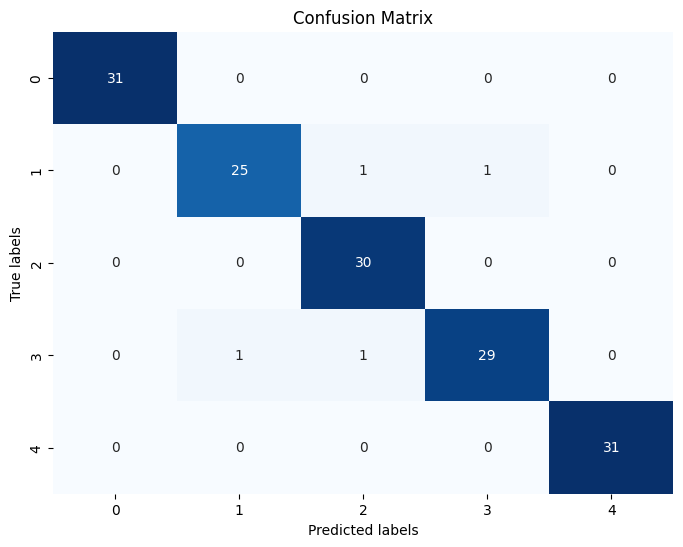

Accuracy on validation set: 97.33%


In [164]:
eval(model, val_loader, criterion, optimizer)

In [165]:
print(model)

ModelV1(
  (conv1): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (activation1): ReLU()
  (activation2): Sigmoid()
  (pool): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=38416, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=5, bias=True)
)


In [166]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [167]:
num_params = count_parameters(model)

print("Number of parameters in the model_Melspectogram:", num_params)

Number of parameters in the model_Melspectogram: 7684553


In [168]:
torch.save(model.state_dict(), "models/model_mel.pth")

In [107]:
# Alex Net number of parameters is 62.3 million , while this model we trained is just 7.6 million
# Almost 8 times smaller than alexnet

 # MFCC

In [17]:
def getSpectrogrammfcc(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_ms, n_mfcc=13)
    librosa.display.specshow(mfcc, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

In [18]:
def makeSpectrogramImagmfcc(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        getSpectrogrammfcc(input_file, output_file)

In [19]:
makeSpectrogramImagmfcc('heart_dataset/AS', 'heart_dataset_image_mfcc/AS')

In [ ]:
makeSpectrogramImagmfcc('heart_dataset/MR', 'heart_dataset_image_mfcc/MR')

In [21]:
makeSpectrogramImagmfcc('heart_dataset/MS', 'heart_dataset_image_mfcc/MS')

In [22]:
makeSpectrogramImagmfcc('heart_dataset/MVP', 'heart_dataset_image_mfcc/MVP')

In [23]:
makeSpectrogramImagmfcc('heart_dataset/Normal', 'heart_dataset_image_mfcc/Normal')

In [37]:
class heartDatasetmfcc(Dataset):
    def __init__(self, X , Y, transform=None):
        self.image_name = X
        self.labels = Y
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = self.image_name.iloc[idx]
        parts = img_name.split('_', 2)[1]
        if parts == "N":
            parts = "Normal"
        img_name_png = img_name.split('.', 1)[0]

        img_path = os.path.join("heart_dataset_image_mfcc/"+ parts +"/" + img_name_png + ".png")

        # Open image
        img = Image.open(img_path)

        # Convert label to PyTorch tensor
        label = self.labels[idx]

        # Apply transforms if available
        if self.transform:
            img = self.transform(img)

        return img, label

In [113]:
train_Dataset = heartDatasetmfcc(X_train,y_train, transform=transform)
test_Dataset = heartDatasetmfcc(X_test,y_test, transform=transform)
val_Dataset = heartDatasetmfcc(X_val,y_val, transform=transform)

In [114]:
batch_size = 2

train_loader = DataLoader(train_Dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_Dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_Dataset, batch_size=batch_size, shuffle=False)

In [115]:
class ModelV2(torch.nn.Module):
    def __init__(self):
        super(ModelV2, self).__init__()

        # Define convolutional layer
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=4, out_channels=4, kernel_size=5, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(4),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        
        # Define convolutional layer
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(4),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
        """
         # Define convolutional layer
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=24, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(24),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
        
         # Define convolutional layer
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=9, out_channels=18, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(18),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
         # Define convolutional layer
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=18, out_channels=21, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(21),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        """
        

        # Define fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(4*24*24, 5),
        )

    def forward(self, x):
        #print(x.shape)
        x = self.conv1(x)
        #print(x.shape)
        x = self.conv2(x)
        #print(x.shape)
        """
        x = self.conv3(x)
        #print(x.shape)
        
        x = self.conv4(x)
        #print(x.shape)
        x = self.conv5(x)
        #print(x.shape)
        """
        # Flatten the output before passing to fully connected layer
        x = torch.flatten(x, start_dim=1)
        #print(x.shape)
        x = self.fc(x)
        #print(x.shape)

        return x

In [116]:
learning_rate = 0.0001
num_epochs = 100

# Initialize model
model_mfcc = ModelV2().cuda()

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model_mfcc.parameters(), lr=learning_rate)

Epoch [1/100], Training Loss: 0.8758, Testing Loss: 0.5237, Accuracy on test set: 86.00%
Epoch [2/100], Training Loss: 0.4106, Testing Loss: 0.3404, Accuracy on test set: 92.67%
Epoch [3/100], Training Loss: 0.2835, Testing Loss: 0.2805, Accuracy on test set: 91.33%
Epoch [4/100], Training Loss: 0.2091, Testing Loss: 0.2648, Accuracy on test set: 88.00%
Epoch [5/100], Training Loss: 0.1762, Testing Loss: 0.2022, Accuracy on test set: 92.00%
Epoch [6/100], Training Loss: 0.1399, Testing Loss: 0.1526, Accuracy on test set: 94.67%
Epoch [7/100], Training Loss: 0.1182, Testing Loss: 0.1025, Accuracy on test set: 98.00%
Epoch [8/100], Training Loss: 0.0899, Testing Loss: 0.1338, Accuracy on test set: 95.33%
Epoch [9/100], Training Loss: 0.0864, Testing Loss: 0.1090, Accuracy on test set: 98.00%
Epoch [10/100], Training Loss: 0.0690, Testing Loss: 0.0829, Accuracy on test set: 98.67%
Epoch [11/100], Training Loss: 0.0626, Testing Loss: 0.0869, Accuracy on test set: 97.33%
Epoch [12/100], Tra

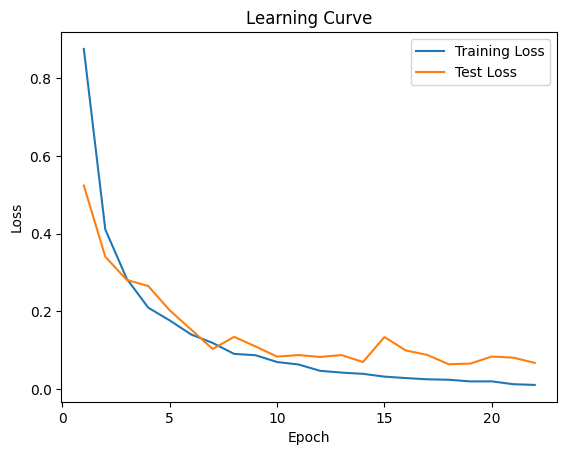

In [117]:
train_losses,test_losses,accuracy = train(model_mfcc, train_loader, test_loader, criterion, optimizer, num_epochs)

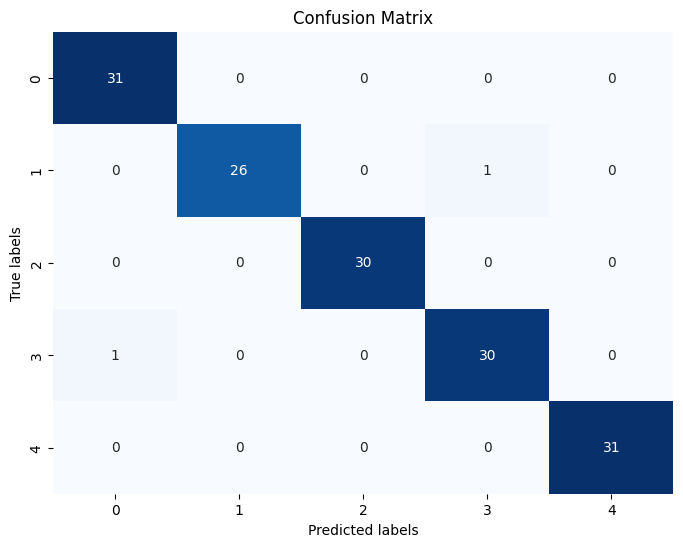

Accuracy on validation set: 98.67%


In [152]:
eval(model_mfcc, val_loader, criterion, optimizer)

In [120]:
num_params = count_parameters(model_mfcc)

print("Number of parameters in the model_MFCC:", num_params)

Number of parameters in the model_MFCC: 12093


In [121]:
torch.save(model_mfcc.state_dict(), "models/model_mfcc.pth")

In [ ]:
# Alex Net number of parameters is 62.3 million , while this model we trained using MFCC is just 0.01209
# Almost 5191 times less paramter than alexnet